In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing dataframes
path = r'C:\Instacart Basket Achievement 4 NEW'

In [3]:
path

'C:\\Instacart Basket Achievement 4 NEW'

In [4]:
ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_group,income_group,interested_in_relevant_goods,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other


In [6]:
ords_prods_custs_merge.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_group,income_group,interested_in_relevant_goods,customer_profile
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,0,single,53755,both,West,No,26-35,50k-70k,True,Single Adult
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,0,single,53755,both,West,No,26-35,50k-70k,True,Single Adult
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,0,single,53755,both,West,No,26-35,50k-70k,True,Single Adult
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,0,single,53755,both,West,No,26-35,50k-70k,True,Single Adult
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,0,single,53755,both,West,No,26-35,50k-70k,True,Single Adult


In [7]:
column_names = ords_prods_custs_merge.columns

In [8]:
column_names

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_order_price', 'spending_flag', 'median_days_since_prior_order',
       'regularity_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependents', 'fam_status', 'income', '_merge', 'Region',
       'exclusion_flag', 'age_group', 'income_group',
       'interested_in_relevant_goods', 'customer_profile'],
      dtype='object')

In [10]:
# Grouping by day of the week and hour of the day
busiest_days_hours = ords_prods_custs_merge.groupby(['orders_day_of_week', 'order_hour_of_day']).size().unstack()

In [27]:
busiest_days_hours

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
orders_day_of_week,,,,,,,,,,,,,,,,,,,,,
0,37261,21201,12271,8385,7973,10992,33732,129234,295324,423642,...,537202,522761,475228,373612,269281,205501,175654,146333,115703,68011
1,35377,17356,10095,6776,7374,13819,50963,160163,322665,488212,...,431977,421025,397348,320117,244481,187707,144375,114824,87339,54366
2,28248,13915,7953,6813,6560,12333,42184,118610,215623,316903,...,319934,318098,314981,263298,214042,161632,123678,98497,76774,50317
3,26159,12646,7991,5488,6350,11203,39657,106823,190903,267824,...,290856,299078,291981,247743,202202,155467,116095,96363,77991,47575
4,23287,12987,7600,6089,6508,11571,38546,109694,187368,259850,...,284001,286034,284756,241866,197136,160906,125145,104322,85737,52320
5,27887,14312,8881,7911,8380,14228,45061,124606,216662,303016,...,331431,328905,312980,258563,207269,159066,120644,94871,75335,51937
6,29823,17204,10900,7334,7618,10272,30870,114083,230565,304164,...,372502,360065,336407,277146,216773,163599,125318,107901,88181,60028


In [28]:
# Map numerical day representation to day names
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

In [40]:
day_mapping

{0: 'Saturday',
 1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday'}

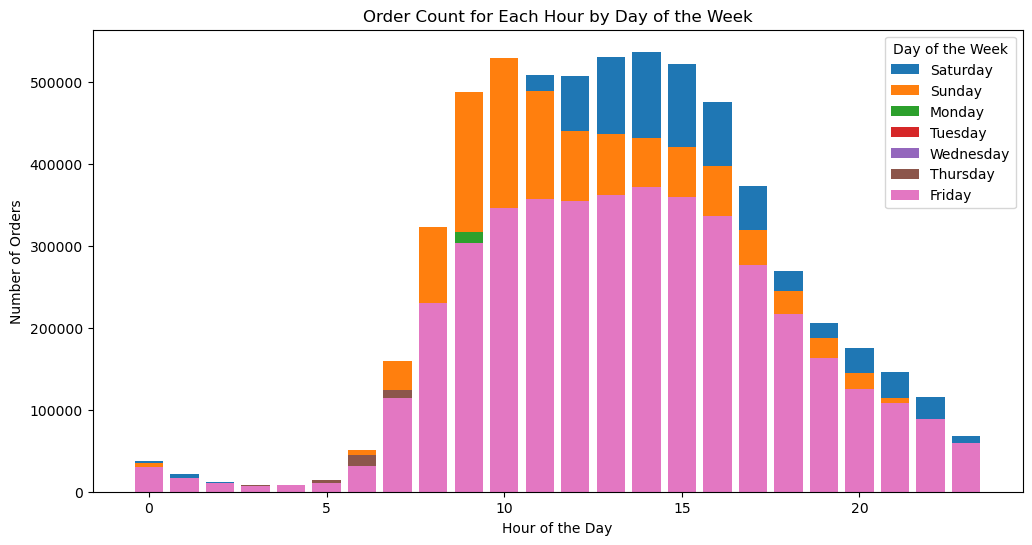

In [47]:
import matplotlib.pyplot as plt
import calendar

# Assuming 'busiest_days_hours' is your DataFrame
# Assuming you have days of the week represented by numbers (0 to 6)

# Map numerical day representation to day names
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Plotting a bar graph
plt.figure(figsize=(12, 6))
for day_num, day_name in day_mapping.items():
    day_data = busiest_days_hours.loc[day_num]
    plt.bar(day_data.index, day_data, label=day_name)

plt.title('Order Count for Each Hour by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.legend(title='Day of the Week', loc='upper right')
plt.show()


In [12]:
# Grouping by hour of the day and calculating total spending
spending_by_hour = ords_prods_custs_merge.groupby('order_hour_of_day')['mean_order_price'].sum()

In [13]:
price_range_counts = ords_prods_custs_merge['price_range_loc'].value_counts()

In [14]:
# Grouping by department and calculating the frequency of product orders
popular_departments = ords_prods_custs_merge['department_id'].value_counts()

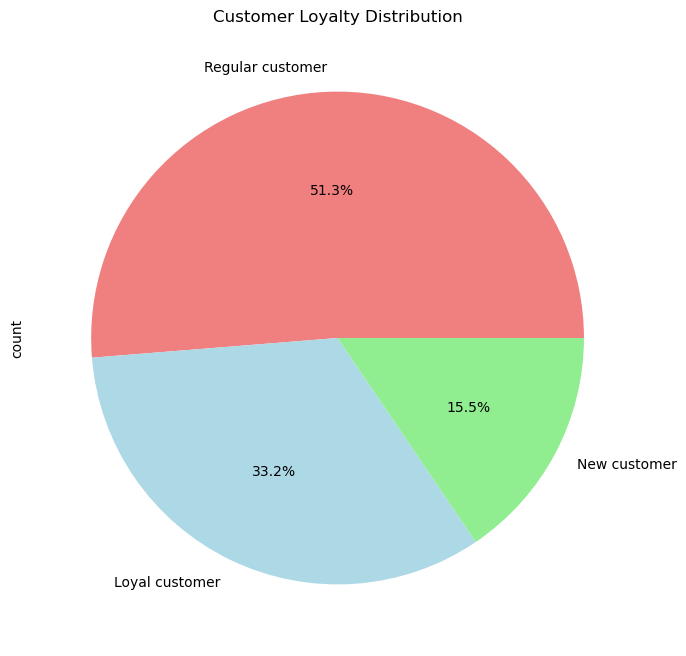

In [15]:
loyalty_distribution = ords_prods_custs_merge['loyalty_flag'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
loyalty_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Customer Loyalty Distribution')
plt.show()

In [17]:
# Count the frequency of each product
popular_products = ords_prods_custs_merge['product_name'].value_counts()

In [20]:
# Select the top 10 popular products
top_10_products = popular_products.head(10)

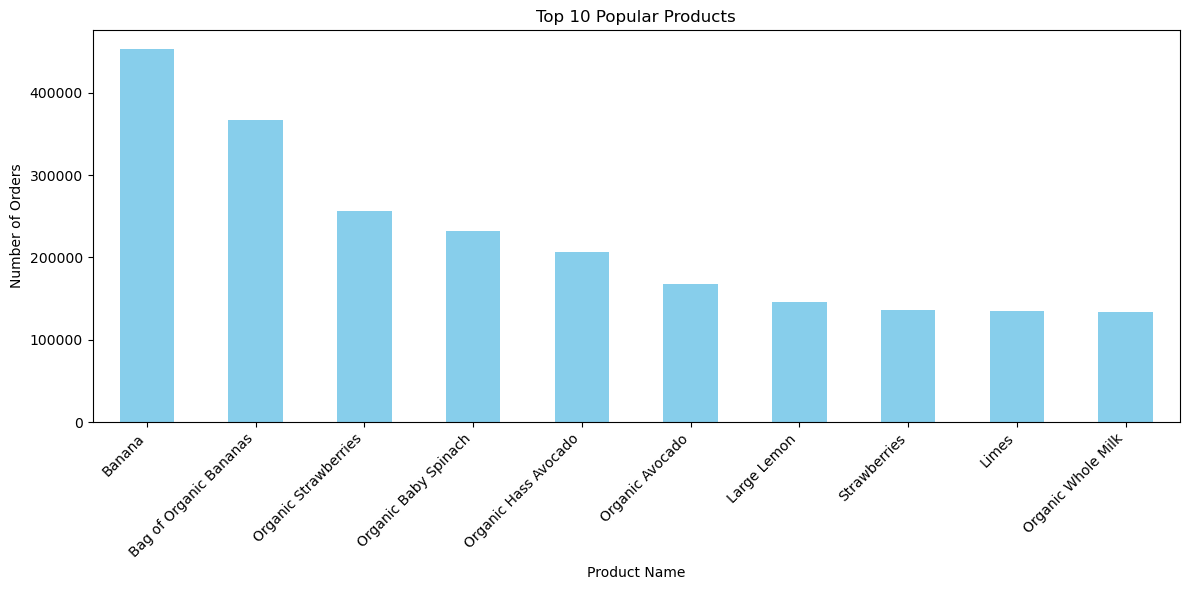

In [21]:
# Plotting a bar chart for the top 10 popular products
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

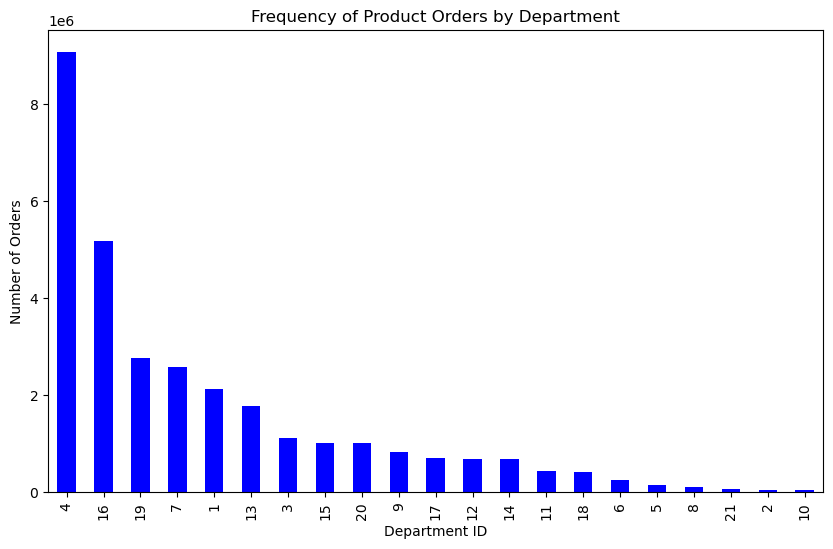

In [24]:
# Count the frequency of orders for each department
popular_departments = ords_prods_custs_merge['department_id'].value_counts()

# Plotting a bar chart for popular departments
plt.figure(figsize=(10, 6))
popular_departments.plot(kind='bar', color='blue')
plt.title('Frequency of Product Orders by Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.show()

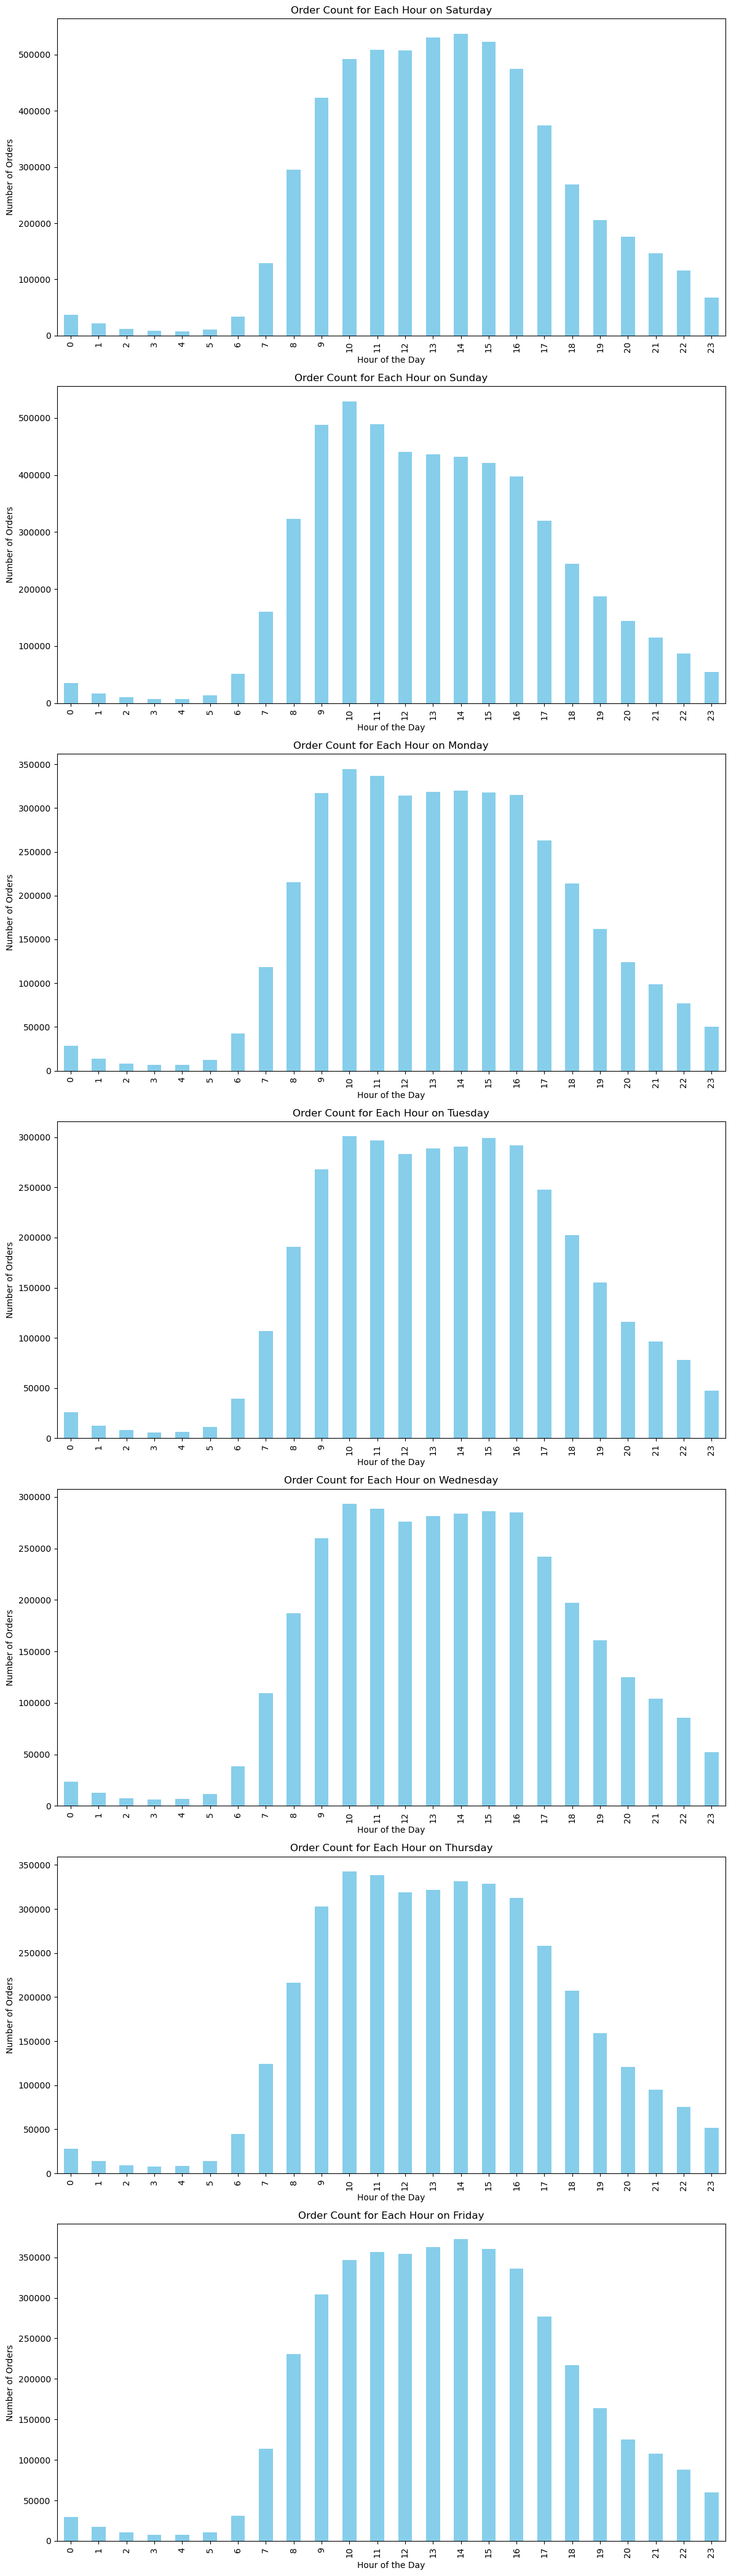

In [48]:
import matplotlib.pyplot as plt
import calendar

# Assuming 'busiest_days_hours' is your DataFrame
# Assuming you have days of the week represented by numbers (0 to 6)

# Map numerical day representation to day names
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating subplots for each day
fig, axes = plt.subplots(nrows=len(busiest_days_hours), ncols=1, figsize=(12, 6 * len(busiest_days_hours)))

for i, (day_num, day_name) in enumerate(day_mapping.items()):
    day_data = busiest_days_hours.loc[day_num]
    day_data.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Order Count for Each Hour on {day_name}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Number of Orders')

plt.tight_layout()
plt.show()


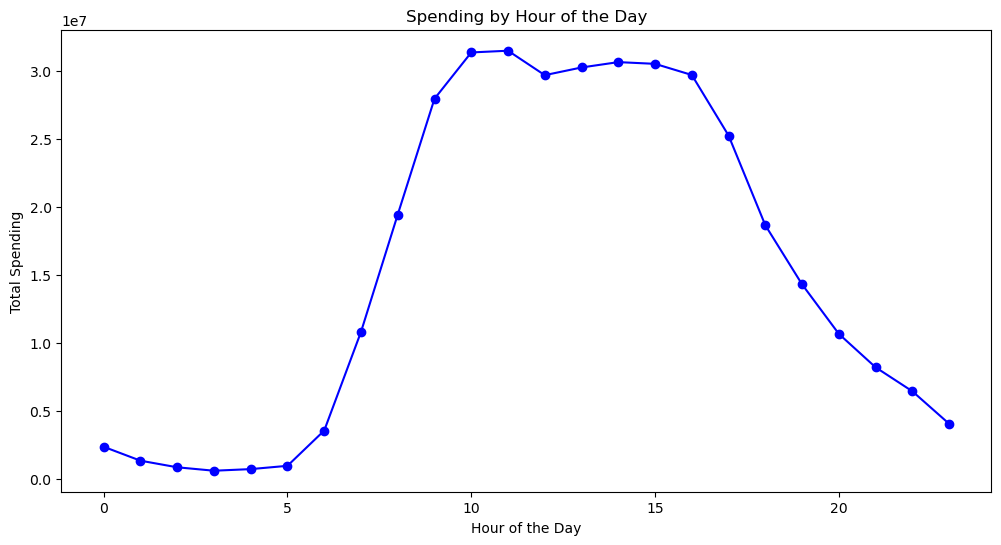

In [50]:
# Grouping by hour of the day and calculating total spending
spending_by_hour = ords_prods_custs_merge.groupby('order_hour_of_day')['mean_order_price'].sum()

# Plotting a line chart
plt.figure(figsize=(12, 6))
plt.plot(spending_by_hour.index, spending_by_hour.values, marker='o', linestyle='-', color='b')
plt.title('Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spending')
plt.show()


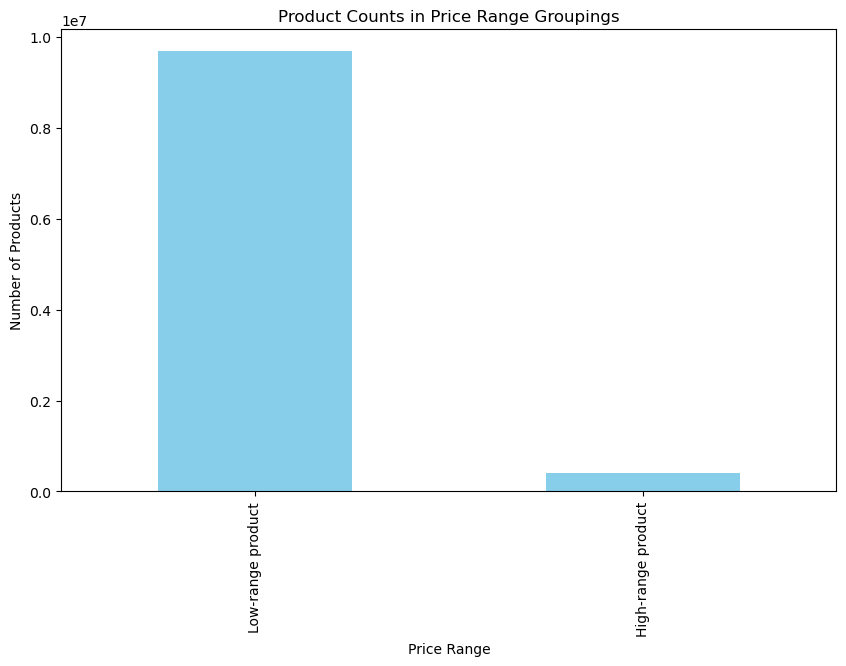

In [51]:
# Assuming 'price_range_loc' is a categorical column indicating price range groupings
price_range_counts = ords_prods_custs_merge['price_range_loc'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Product Counts in Price Range Groupings')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.show()
